In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data_path = "../data/CreditCardApprovals/clean_dataset.csv"
card_approval_df = pd.read_csv(data_path)

In [3]:
print(card_approval_df.head())

   Gender    Age   Debt  Married  BankCustomer     Industry Ethnicity  \
0       1  30.83  0.000        1             1  Industrials     White   
1       0  58.67  4.460        1             1    Materials     Black   
2       0  24.50  0.500        1             1    Materials     Black   
3       1  27.83  1.540        1             1  Industrials     White   
4       1  20.17  5.625        1             1  Industrials     White   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   
2           1.50             1         0            0               0   
3           3.75             1         1            5               1   
4           1.71             1         0            0               0   

        Citizen  ZipCode  Income  Approved  
0       ByBirth      202       0         1  
1       ByBirth       43     560

In [4]:
print(card_approval_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB
None


In [5]:
card_approval_df.duplicated().sum()

0

In [7]:
card_approval_df.drop(columns = 'ZipCode')

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,750,0


In [11]:
card_approval_df[['Age','Debt','YearsEmployed','CreditScore','Income']].describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.514116,4.758725,2.223406,2.40000,1017.385507
std,11.860245,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


<Axes: xlabel='Age', ylabel='Count'>

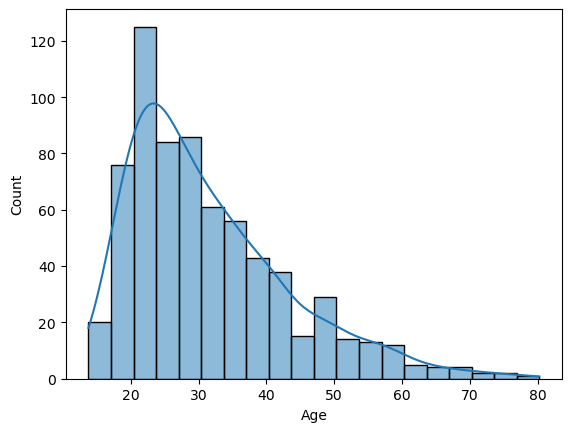

In [13]:
sns.histplot(card_approval_df.Age, kde=True)

<Axes: ylabel='count'>

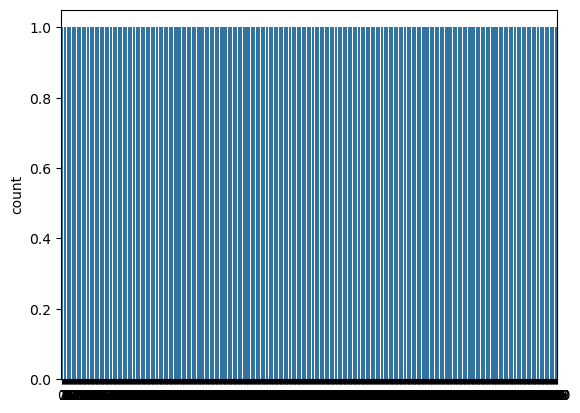

In [16]:
sns.countplot(card_approval_df.Gender)

In [13]:
selected_features = [card_approval_df['Age'][:20]]
selected_features

[0     30.83
 1     58.67
 2     24.50
 3     27.83
 4     20.17
 5     32.08
 6     33.17
 7     22.92
 8     54.42
 9     42.50
 10    22.08
 11    29.92
 12    38.25
 13    48.08
 14    45.83
 15    36.67
 16    28.25
 17    23.25
 18    21.83
 19    19.17
 Name: Age, dtype: float64]

In [14]:
selected_features = card_approval_df['Age'][:20].tolist()
selected_features

[30.83,
 58.67,
 24.5,
 27.83,
 20.17,
 32.08,
 33.17,
 22.92,
 54.42,
 42.5,
 22.08,
 29.92,
 38.25,
 48.08,
 45.83,
 36.67,
 28.25,
 23.25,
 21.83,
 19.17]

In [17]:
df = card_approval_df[:, 'Debt']

InvalidIndexError: (slice(None, None, None), 'Debt')

In [18]:
df = card_approval_df['Debt']

In [19]:
df

0       0.000
1       4.460
2       0.500
3       1.540
4       5.625
        ...  
685    10.085
686     0.750
687    13.500
688     0.205
689     3.375
Name: Debt, Length: 690, dtype: float64